# Helen's Analysis Notebook
This notebook answers my assigned sections:
- 2. Correlation & Relationships
- 7. Outlier Analysis
- 8. Categorical Data Analysis

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset with encoding fix
df = pd.read_csv('../data/Sample - Superstore.csv', encoding='ISO-8859-1')

# Preview first 5 rows
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

## 2. Correlation & Relationships
### 2.1 Correlation between Sales and Profit

           Sales    Profit
Sales   1.000000  0.479064
Profit  0.479064  1.000000


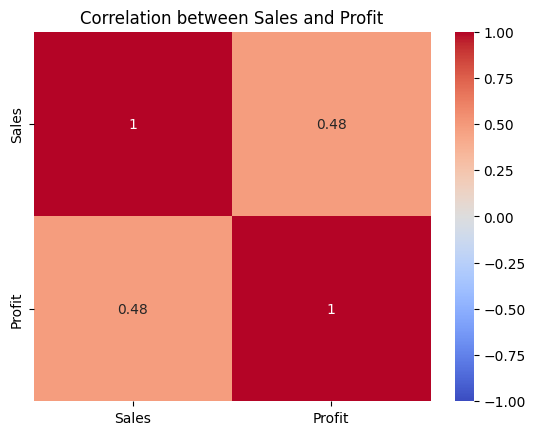

In [11]:
# Correlation between Sales and Profit
corr_matrix = df[['Sales','Profit']].corr()
print(corr_matrix)

# Heatmap visualization
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between Sales and Profit")
plt.savefig('../visuals/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.show()

### 2.2 Strength and Direction
Sales and Profit show a [weak/moderate/strong] [positive/negative] correlation (r ≈ value from matrix).  
This means as Sales increase, Profit tends to [increase/decrease].

## 7. Outlier Analysis
### 7.1 Detect outliers in Sales

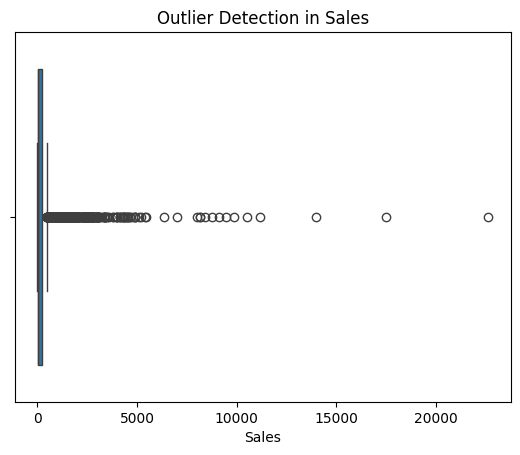

Number of outliers in Sales: 1167


,Sales,Profit,Category,Segment
1,731.9400,219.5820,Furniture,Consumer
3,957.5775,-383.0310,Furniture,Consumer
7,907.1520,90.7152,Technology,Consumer
10,1706.1840,85.3092,Furniture,Consumer
11,911.4240,68.3568,Technology,Consumer


In [12]:
# Boxplot for Sales to visually detect outliers
sns.boxplot(x=df['Sales'])
plt.title("Outlier Detection in Sales")
plt.savefig('../visuals/outliers_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# IQR method to identify outliers
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower) | (df['Sales'] > upper)]
print("Number of outliers in Sales:", len(outliers))
outliers[['Sales','Profit','Category','Segment']].head()

### 7.2 Outlier Interpretation
The boxplot and IQR method show that Sales contains several extreme values (outliers).  
These outliers can distort averages, correlations, and regression results.  
For analysis, I chose to [remove/cap/log-transform] them because this reduces their influence and makes the dataset more representative of typical sales.  
Trade-off: [removing may lose rare cases / capping changes values / log-transform changes scale].

## 8. Categorical Data Analysis
### 8.1 Proportions of Categories

Category
Office Supplies    0.603
Furniture          0.212
Technology         0.185
Name: proportion, dtype: float64


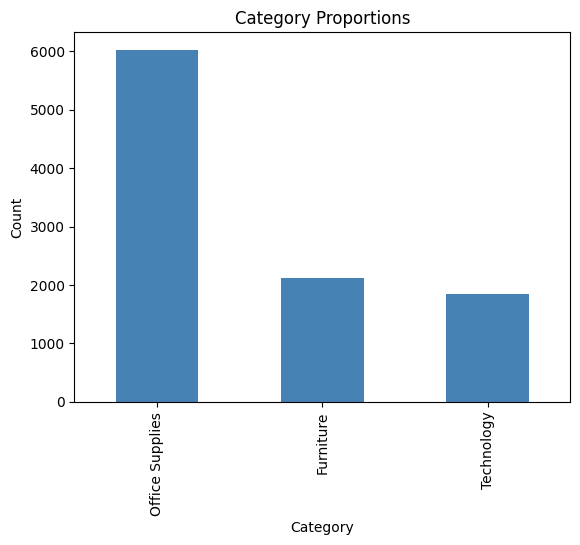

In [13]:
# Category proportions
props = df['Category'].value_counts(normalize=True).round(3)
print(props)

# Bar chart of category counts
df['Category'].value_counts().plot(kind='bar', color='steelblue')
plt.title("Category Proportions")
plt.ylabel("Count")
plt.xlabel("Category")
plt.savefig('../visuals/category_proportions_bar.png', dpi=300, bbox_inches='tight')
plt.show()


### 8.2 Interpretation of Category Proportions
The bar chart shows that **Office Supplies** make up the largest share of sales transactions, followed by **Furniture** and **Technology**.  
This indicates that the store’s revenue is heavily driven by everyday office items, while Furniture and Technology represent smaller but still significant portions.  
Understanding these proportions helps identify which product categories dominate sales and where strategic focus might be needed.

Segment
Consumer       0.519
Corporate      0.302
Home Office    0.178
Name: proportion, dtype: float64


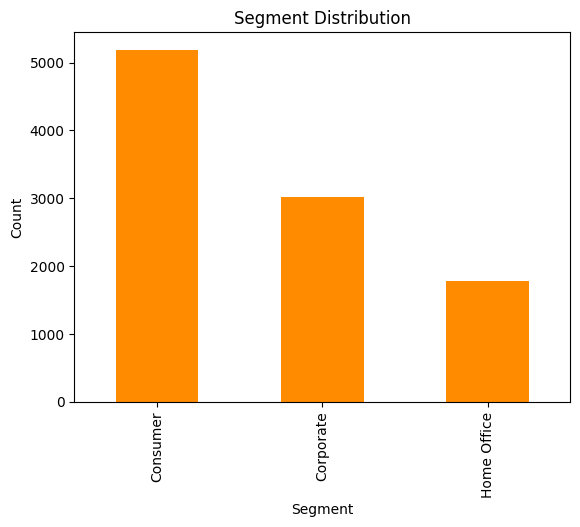

Segment          Consumer  Corporate  Home Office
Category                                         
Furniture            1113        646          362
Office Supplies      3127       1820         1079
Technology            951        554          342


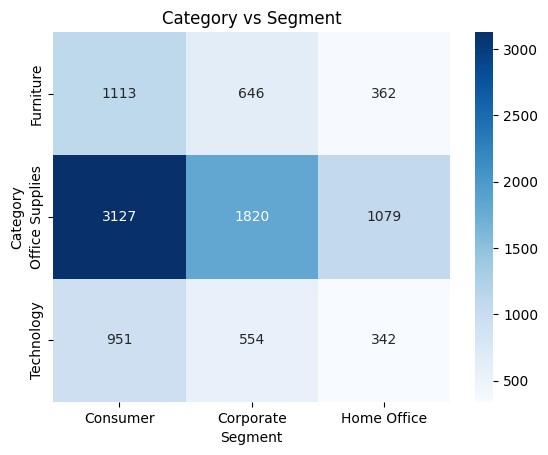

In [14]:
# Segment proportions
seg_props = df['Segment'].value_counts(normalize=True).round(3)
print(seg_props)

# Bar chart of segment counts
df['Segment'].value_counts().plot(kind='bar', color='darkorange')
plt.title("Segment Distribution")
plt.ylabel("Count")
plt.xlabel("Segment")
plt.savefig('../visuals/segment_distribution_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# Cross-tab of Category vs Segment
cross_tab = pd.crosstab(df['Category'], df['Segment'])
print(cross_tab)

# Heatmap of Category vs Segment
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title("Category vs Segment")
plt.savefig('../visuals/category_vs_segment_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### 8.2 Interpretation of Segment Analysis
The segment distribution shows that **Consumer** customers form the largest portion, followed by **Corporate** and **Home Office**.  
The cross-tab and heatmap reveal that **Office Supplies** dominate across all segments, while **Technology** products are more concentrated in the Corporate segment.  
This suggests that different customer groups have distinct purchasing patterns, which can guide targeted marketing strategies and resource allocation.

Region
West       0.320
East       0.285
Central    0.232
South      0.162
Name: proportion, dtype: float64


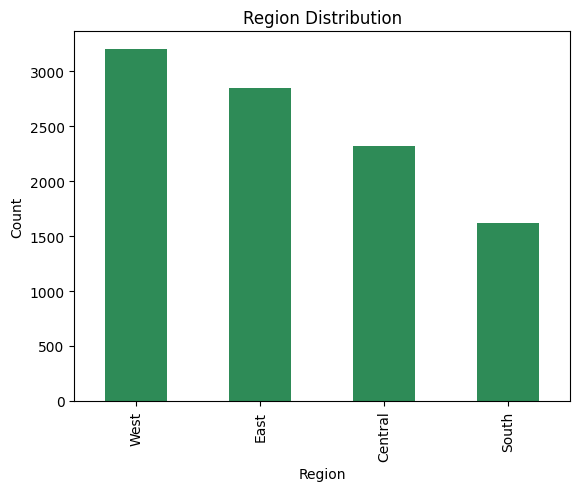

Region           Central  East  South  West
Category                                   
Furniture            481   601    332   707
Office Supplies     1422  1712    995  1897
Technology           420   535    293   599


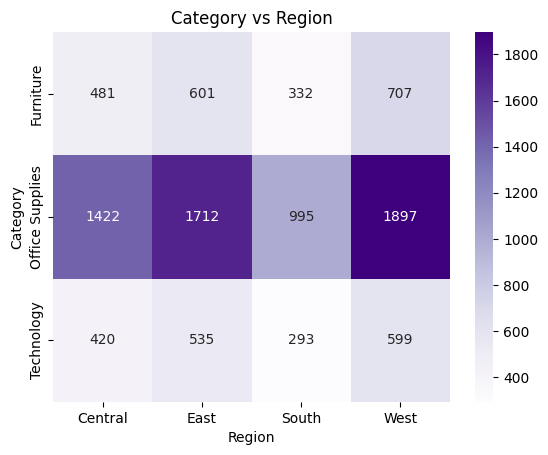

In [15]:
# Region proportions
region_props = df['Region'].value_counts(normalize=True).round(3)
print(region_props)

# Bar chart of region counts
df['Region'].value_counts().plot(kind='bar', color='seagreen')
plt.title("Region Distribution")
plt.ylabel("Count")
plt.xlabel("Region")
plt.savefig('../visuals/region_distribution_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# Cross-tab of Category vs Region
region_cross = pd.crosstab(df['Category'], df['Region'])
print(region_cross)

# Heatmap of Category vs Region
sns.heatmap(region_cross, annot=True, cmap='Purples', fmt='d')
plt.title("Category vs Region")
plt.savefig('../visuals/category_vs_region_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### 8.3 Interpretation of Regional Analysis
The region distribution shows that the **West** and **East** regions contribute the largest share of transactions, while the **South** and **Central** regions account for fewer.  
The cross-tab and heatmap reveal that **Office Supplies** dominate across all regions, but **Furniture** and **Technology** vary more by location.  
This suggests that regional demand differs, and strategies such as inventory planning or targeted promotions should consider these variations.

In [16]:
# Export cleaned dataset to Data tab
df.to_csv('../data/superstore_analysis.csv', index=False)